In [3]:
import openpyxl
import pandas as pd

workbook = openpyxl.load_workbook(filename="oldData\drHalaData.xlsx", data_only=True)
sheet = workbook.active
data = []
for row in sheet.iter_rows():
  row_data = []
  for cell in row:
    row_data.append(cell.value)
  data.append(row_data)

data = pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,link to the post,the post,date,None,group name,group link,keyword used,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,https://www.facebook.com/groups/63756427047853...,السلام عليكم \nف حد جرب يستبدل أجهزة قديمة عن ...,2021,None,أسأل قبل ما تشترى علشان ما يتنصبش عليك,https://www.facebook.com/groups/637564270478538/,تدوير,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,https://www.facebook.com/groups/63756427047853...,السلام عليكم ياجماعه الخير عوزه اعرف ايه موضوع...,2021,None,أسأل قبل ما تشترى علشان ما يتنصبش عليك,https://www.facebook.com/groups/637564270478538/,تدوير,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,https://www.facebook.com/groups/63756427047853...,لو سمحتوا حد عارف نظام برنامح اي تدوير في مصر ...,2021,None,أسأل قبل ما تشترى علشان ما يتنصبش عليك,https://www.facebook.com/groups/637564270478538/,تدوير,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,https://www.facebook.com/groups/63756427047853...,حد يعرف يفدني في موضوع مبادرة تدوير المخلفات ا...,2021,None,أسأل قبل ما تشترى علشان ما يتنصبش عليك,https://www.facebook.com/groups/637564270478538/,تدوير,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1985,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1986,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1987,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [4]:
data=data.iloc[1:]

data = data[[1,6]]
new_column_names = {'1': 'text', '6': 'word'}
data = data.rename(columns=new_column_names)
data = data.dropna()
data

,1,6
1,السلام عليكم \nف حد جرب يستبدل أجهزة قديمة عن ...,تدوير
2,السلام عليكم ياجماعه الخير عوزه اعرف ايه موضوع...,تدوير
3,لو سمحتوا حد عارف نظام برنامح اي تدوير في مصر ...,تدوير
4,حد يعرف يفدني في موضوع مبادرة تدوير المخلفات ا...,تدوير
5,لو سمحتوا ايه افضل بوتجاز ف السوق عن تجربه من ...,مصرى
...,...,...
1004,مساء الخير .. بجانب الالتزام بنظام غذائي معين ...,اكل صحي
1005,من فضلكم حد جرب قلايه بدون زيت وايه احسن ماركه...,استهلاك كهربا
1006,يا جماعة انا بقيت بصرف فلوس كتير اوي عالاكل و ...,نقلل مصاريف
1007,مساء الخير احلي جروب متفاعل ودووود مساعد 🌹🇪🇬\n...,سعر كويس


In [5]:
import re
import openpyxl

def clean_text(text, replace_data):
  text = re.sub(r"[^\u0600-\u06FF]", " ", str(text))
  text = re.sub(r"[^\w\s]", "", str(text))
  text = re.sub(r"(.)\1+", r"\1", str(text))

  # Apply word replacements
  for original_word, replacement in replace_data.items():
    text = text.replace(original_word, replacement)
  return text.strip()

def fetch_replace_data(excel_file, sheet_name):
  # Open the Excel workbook
  workbook = openpyxl.load_workbook(excel_file , data_only=True)
  sheet = workbook[sheet_name]

  # Read data from the sheet (assuming words are in first two columns)
  replace_data = {}
  for row in sheet.iter_rows(min_row=2):  # Skip the eheader row (assuming row 1)
    original_word = row[0].value
    replacement = row[1].value
    if original_word and replacement:  # Check for empty values
      replace_data[original_word] = replacement

  return replace_data

# Example usage
excel_file = 'replacements.xlsx'  # Replace with your actual file path
sheet_name = "Sheet1"  # Replace with your sheet name (if different)
replace_data = fetch_replace_data(excel_file, sheet_name)

cleaned_text_column = data[1].apply(clean_text, args=(replace_data,))
data['Cleaned Text'] = cleaned_text_column
print(cleaned_text_column)


1       السلام عليكم ف حد جرب يستبدل أجهزة قديمة عن طر...
2       السلام عليكم ياجماعه الخير عوزه اعرف ايه موضوع...
3       لو سمحتوا حد عارف نظام برنامح اي تدوير في مصر ...
4       حد يعرف يفدني في موضوع مبادرة تدوير مخالفه الا...
5       لو سمحتوا ايه افضل بوتجاز ف سوق عن تجربه من حي...
                              ...                        
1004    مساء الخير بجانب الالتزام بنظام غذائي معين كنت...
1005    من فضلكم حد جرب قلايه بدون زيت وايه احسن ماركه...
1006    يا جماعة انا بقيت بصرف مال كتير اوي عالاكل و ا...
1007    مساء الخير احلي جروب متفاعل ودود مساعد بخبرتكم...
1008    شراء شجر و هنزرعه ف شارع باذن اله و عد مش قليل...
Name: 1, Length: 738, dtype: object


In [6]:
file_path = "./oldData/replace.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet2")
Enviromental  = df['Enviromental dimesnsion'].dropna()
Economic  = df['Economic Dimension'].dropna()
Social = df['Social dimension'].dropna()
rules = {
    "Enviromental": Enviromental.tolist(),
    "Economic": Social.tolist(),
    "Social": Economic.tolist()
}

def classify_text(text, rules):
    for class_name, keywords in rules.items():
        if any(keyword in text for keyword in keywords):
            return class_name
    return "unclassified"  # Default class for non-matching text


def classify_texttt(text, rules):
  for class_name, keywords in rules.items():
    for keyword in keywords:
      if keyword.lower() in text.lower():  
        return class_name, keyword
  return "unclassified", None 

data

,1,6,Cleaned Text
1,السلام عليكم \nف حد جرب يستبدل أجهزة قديمة عن ...,تدوير,السلام عليكم ف حد جرب يستبدل أجهزة قديمة عن طر...
2,السلام عليكم ياجماعه الخير عوزه اعرف ايه موضوع...,تدوير,السلام عليكم ياجماعه الخير عوزه اعرف ايه موضوع...
3,لو سمحتوا حد عارف نظام برنامح اي تدوير في مصر ...,تدوير,لو سمحتوا حد عارف نظام برنامح اي تدوير في مصر ...
4,حد يعرف يفدني في موضوع مبادرة تدوير المخلفات ا...,تدوير,حد يعرف يفدني في موضوع مبادرة تدوير مخالفه الا...
5,لو سمحتوا ايه افضل بوتجاز ف السوق عن تجربه من ...,مصرى,لو سمحتوا ايه افضل بوتجاز ف سوق عن تجربه من حي...
...,...,...,...
1004,مساء الخير .. بجانب الالتزام بنظام غذائي معين ...,اكل صحي,مساء الخير بجانب الالتزام بنظام غذائي معين كنت...
1005,من فضلكم حد جرب قلايه بدون زيت وايه احسن ماركه...,استهلاك كهربا,من فضلكم حد جرب قلايه بدون زيت وايه احسن ماركه...
1006,يا جماعة انا بقيت بصرف فلوس كتير اوي عالاكل و ...,نقلل مصاريف,يا جماعة انا بقيت بصرف مال كتير اوي عالاكل و ا...
1007,مساء الخير احلي جروب متفاعل ودووود مساعد 🌹🇪🇬\n...,سعر كويس,مساء الخير احلي جروب متفاعل ودود مساعد بخبرتكم...


In [7]:
data["sentiment"] = data["Cleaned Text"].apply(lambda text: classify_texttt(text, rules)[0])
data["keyword"] = data["Cleaned Text"].apply(lambda text: classify_texttt(text, rules)[1])
data

,1,6,Cleaned Text,sentiment,keyword
1,السلام عليكم \nف حد جرب يستبدل أجهزة قديمة عن ...,تدوير,السلام عليكم ف حد جرب يستبدل أجهزة قديمة عن طر...,Enviromental,تدوير
2,السلام عليكم ياجماعه الخير عوزه اعرف ايه موضوع...,تدوير,السلام عليكم ياجماعه الخير عوزه اعرف ايه موضوع...,Enviromental,تدوير
3,لو سمحتوا حد عارف نظام برنامح اي تدوير في مصر ...,تدوير,لو سمحتوا حد عارف نظام برنامح اي تدوير في مصر ...,Enviromental,تدوير
4,حد يعرف يفدني في موضوع مبادرة تدوير المخلفات ا...,تدوير,حد يعرف يفدني في موضوع مبادرة تدوير مخالفه الا...,Enviromental,تدوير
5,لو سمحتوا ايه افضل بوتجاز ف السوق عن تجربه من ...,مصرى,لو سمحتوا ايه افضل بوتجاز ف سوق عن تجربه من حي...,Enviromental,جاز
...,...,...,...,...,...
1004,مساء الخير .. بجانب الالتزام بنظام غذائي معين ...,اكل صحي,مساء الخير بجانب الالتزام بنظام غذائي معين كنت...,Social,مقدم
1005,من فضلكم حد جرب قلايه بدون زيت وايه احسن ماركه...,استهلاك كهربا,من فضلكم حد جرب قلايه بدون زيت وايه احسن ماركه...,unclassified,None
1006,يا جماعة انا بقيت بصرف فلوس كتير اوي عالاكل و ...,نقلل مصاريف,يا جماعة انا بقيت بصرف مال كتير اوي عالاكل و ا...,Social,كتير
1007,مساء الخير احلي جروب متفاعل ودووود مساعد 🌹🇪🇬\n...,سعر كويس,مساء الخير احلي جروب متفاعل ودود مساعد بخبرتكم...,Enviromental,كهرباء


In [8]:
replications = data['sentiment'].value_counts()
replications

Enviromental    477
Economic        139
Social           67
unclassified     55
Name: sentiment, dtype: int64

In [9]:
df_filtered = data[data['sentiment'] == 'unclassified']
df_filtered.to_excel('unclassified.xlsx')

In [8]:
data['keyword']

keyword
تدوير      186
كهرباء      68
شغل         64
جو          39
صحي         37
          ... 
الكهربى      1
قرض          1
منتج         1
خضرا         1
سويفل        1
Name: count, Length: 74, dtype: int64

In [14]:
#!pip install deep-translator

from deep_translator import GoogleTranslator

# Translate an Arabic word to English
arabic_word = "سويفل"
translator = GoogleTranslator(source='ar', target='en')
translation = translator.translate(arabic_word)

print(f"The English translation of '{arabic_word}' is: {translation}")

The English translation of 'سويفل' is: Swvl


In [15]:
from deep_translator import GoogleTranslator

def textToENG(text):
    arabic_word = text
    translator = GoogleTranslator(source='ar', target='en')
    translation = translator.translate(arabic_word)
    return translation

data["translation"] = data["keyword"].dropna().apply(lambda text: textToENG(text))

In [16]:
data["translation"].value_counts()

Rotate             168
electricity         68
Fill                64
Egypt               55
Atmosphere          39
                  ... 
Electrophoresis      1
Loan                 1
project              1
Green                1
Swvl                 1
Name: translation, Length: 74, dtype: int64

In [41]:
def create_translation_dict(file_path, sheet_name):
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    df = df[['word', 'translate']]
    return df.set_index('word')['translate'].to_dict()

# Load the translation data into a dictionary
translation_dict = create_translation_dict("./oldData/translate.xlsx", "Sheet1")

def translate_text(text):
    return translation_dict.get(text, text)  # Default to original text if not found

# Apply the translation function to the 'keyword' column
data['translation'] = data['keyword'].dropna().apply(translate_text)



In [42]:
data

,1,6,Cleaned Text,sentiment,keyword,translation
1,السلام عليكم \nف حد جرب يستبدل أجهزة قديمة عن ...,تدوير,السلام عليكم ف حد جرب يستبدل أجهزة قديمة عن طر...,Enviromental,تدوير,recycle
2,السلام عليكم ياجماعه الخير عوزه اعرف ايه موضوع...,تدوير,السلام عليكم ياجماعه الخير عوزه اعرف ايه موضوع...,Enviromental,تدوير,recycle
3,لو سمحتوا حد عارف نظام برنامح اي تدوير في مصر ...,تدوير,لو سمحتوا حد عارف نظام برنامح اي تدوير في مصر ...,Enviromental,تدوير,recycle
4,حد يعرف يفدني في موضوع مبادرة تدوير المخلفات ا...,تدوير,حد يعرف يفدني في موضوع مبادرة تدوير مخالفه الا...,Enviromental,تدوير,recycle
5,لو سمحتوا ايه افضل بوتجاز ف السوق عن تجربه من ...,مصرى,لو سمحتوا ايه افضل بوتجاز ف سوق عن تجربه من حي...,Enviromental,جاز,gas
...,...,...,...,...,...,...
1004,مساء الخير .. بجانب الالتزام بنظام غذائي معين ...,اكل صحي,مساء الخير بجانب الالتزام بنظام غذائي معين كنت...,Social,مقدم,offered
1005,من فضلكم حد جرب قلايه بدون زيت وايه احسن ماركه...,استهلاك كهربا,من فضلكم حد جرب قلايه بدون زيت وايه احسن ماركه...,unclassified,None,NaN
1006,يا جماعة انا بقيت بصرف فلوس كتير اوي عالاكل و ...,نقلل مصاريف,يا جماعة انا بقيت بصرف مال كتير اوي عالاكل و ا...,Social,كتير,many
1007,مساء الخير احلي جروب متفاعل ودووود مساعد 🌹🇪🇬\n...,سعر كويس,مساء الخير احلي جروب متفاعل ودود مساعد بخبرتكم...,Enviromental,كهرباء,electricity


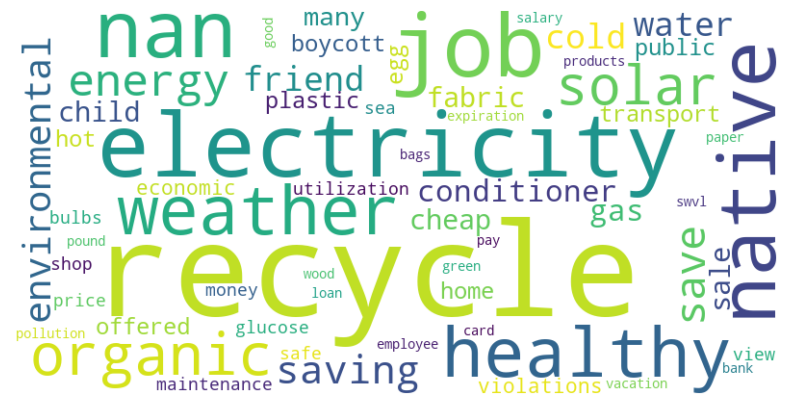

In [58]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
data['translation'] = data['translation'].str.lower()
# Prepare text data
text = " ".join(data["translation"].astype(str))

from collections import Counter
import nltk
from nltk.corpus import stopwords

# ... your code

# Tokenize text
words = nltk.word_tokenize(text)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Create a new text string
text = ' '.join(filtered_words)

word_counts = Counter(text.split())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, min_font_size=1).generate_from_frequencies(word_counts)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
data["translation"].value_counts()


recycle              188
electricity           69
job                   66
native                55
healthy               40
weather               39
organic               28
solar energy          14
save                  12
saving                12
environmental         11
solar                 10
water                  9
friend                 9
cold                   9
conditioner            7
gas                    7
sale                   6
fabric                 6
cheap                  6
child                  6
many                   5
offered                4
egg                    4
home                   4
plastic                4
public transport       4
hot                    4
boycott                4
violations             3
economic               3
money                  2
shop                   2
utilization            2
sea                    2
energy save bulbs      2
view                   2
glucose                2
maintenance            2
safe                   2
